<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/DigitalModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pulse Code Modulation (PCM)

This experiment covers the following topics:
1. Uniform quantization including mid-rise and mid-tread Uniform (Linear) Quantizers.
2. Robust (Non-Linear) Quantizers ($\mu-Law$ quantizers)
3. Quantization of Weak Message Signal
4. Evaluation of quantization by using Signal to Quantization Noise Ratio.

Import necessary libraries

In [2]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

#ASK

22.0
22.0


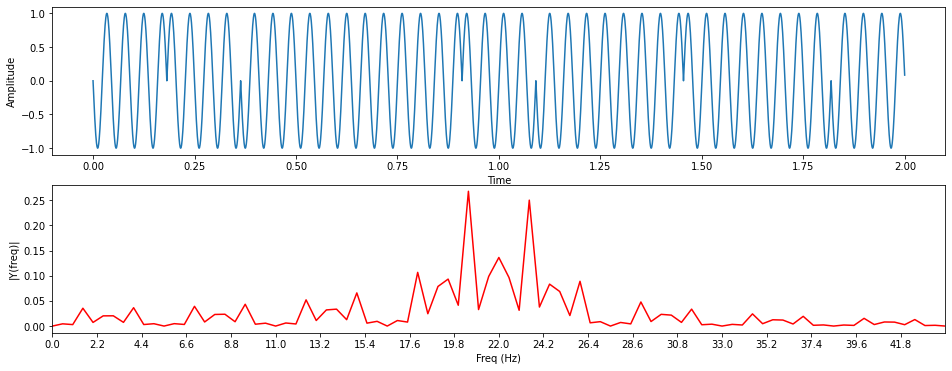

In [57]:
import numpy as np
import sys
from scipy import signal

m=0.2
type='psk'
freq=20
freqs=5

T=2;
bits=[1, 0, 1, 1,1, 0,1,1,0,0,1];
Fs = 150*len(bits);  # sampling rate
Ts = T/(2*Fs); # sampling interval
t = np.arange(0,T,Ts)

freq=4*len(bits)/T
print(freq)

print(freq)
if (type=='fsk'):
	bit_arr = np.array(5*(2*np.array(bits)-1))
	samples_per_bit = 2*Fs/bit_arr.size 
	dd = np.repeat(bit_arr, samples_per_bit)
	y= np.sin(2 * np.pi * (freq + dd) * t)
elif (type=='psk'):
	bit_arr = np.array(180*np.array(bits))
	samples_per_bit = 2*Fs/bit_arr.size 
	dd = np.repeat(bit_arr, samples_per_bit)
	y= np.sin(2 * np.pi * (freq) * t+(np.pi*dd/180))
else:
	bit_arr = np.array(bits)
	samples_per_bit = 2*Fs/bit_arr.size 
	dd = np.repeat(bit_arr, samples_per_bit)
	y= dd*np.sin(2 * np.pi * freq * t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

f = plt.figure(figsize=(16,6))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot(t,y)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

ax2.plot(frq,abs(Y),'r') # plotting the spectrum
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
if (type=='fsk'):
    ax2.set_xlim([0.0, 2*freq])
    ax2.set_xticks(np.arange(freq-2*freqs,freq+2*freqs,freqs/2))
else:
    ax2.set_xlim([0.0, 2*freq])
    ax2.set_xticks(np.arange(0,2*freq,freq/10))
plt.show()


#FSK

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


SNR = 14.014937dB


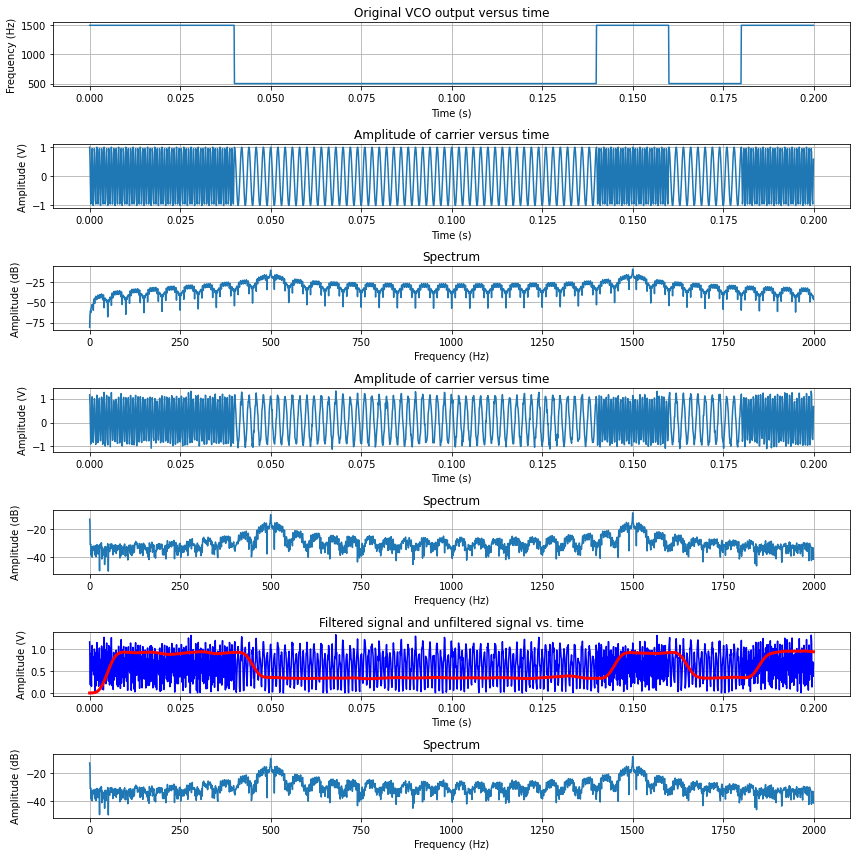

bit errors = 0
bit error percent = 0.00%


In [94]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample

#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
N = 64          #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.10      #noise peak amplitude
N_prntbits = 10 #number of bits to print in plots


"""
Data in
"""
#generate some random data for testing
data_in = np.random.random_integers(0,1,N)

"""
VCO
"""
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc+Fdev)))
    else:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc-Fdev)))
#calculate the output of the VCO
y=np.zeros(0)
y=A * np.cos(2*np.pi*np.multiply(m,t))

### view the data in time and frequency domain
N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

plt.figure(figsize=(12,12))
pl.subplot(7,1,1)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],m[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO output versus time')
pl.grid(True)

pl.subplot(7,1,2)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(7,1,3)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()


"""
Noisy Channel
"""
#create some noise
noise = (np.random.randn(len(y))+1)*A_n
snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print("SNR = %fdB" % snr)
y=np.add(y,noise)

#view the data after adding noise
N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(7,1,4)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Amplitude of carrier versus time')
pl.grid(True)

pl.subplot(7,1,5)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()



"""
Differentiator
"""
y_diff = np.diff(y,1)

"""
Envelope detector + low-pass filter
"""
#create an envelope detector and then low-pass filter
y_env = np.abs(sigtool.hilbert(y_diff))
h=signal.firwin( numtaps=100, cutoff=Fbit*2, nyq=Fs/2)
y_filtered=signal.lfilter( h, 1.0, y_env)
#view the data after adding noise
N_FFT = float(len(y))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y))
y_f = np.fft.fft(np.multiply(y,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))

pl.subplot(7,1,6)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],np.abs(y[0:int(Fs*N_prntbits/Fbit)]),'b')
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_filtered[0:int(Fs*N_prntbits/Fbit)],'r',linewidth=3.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and unfiltered signal vs. time')
pl.grid(True)

pl.subplot(7,1,7)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()
pl.show()

"""
slicer
"""
#calculate the mean of the signal
mean = np.mean(y_filtered)
#if the mean of the bit period is higher than the mean, the data is a 0
rx_data = []
sampled_signal = y_filtered[int(Fs/Fbit/2):len(y_filtered):int(Fs/Fbit)]
for bit in sampled_signal:
    if bit > mean:
        rx_data.append(0)
    else:
        rx_data.append(1)

bit_error=0
for i in range(0,len(data_in)):
    if rx_data[i] != data_in[i]:
        bit_error+=1
print ("bit errors = %d" % bit_error)
print ("bit error percent = %4.2f%%" % (float(bit_error)/float(N)*100))


#BPSK

FSK plots in the time and frequency domain 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


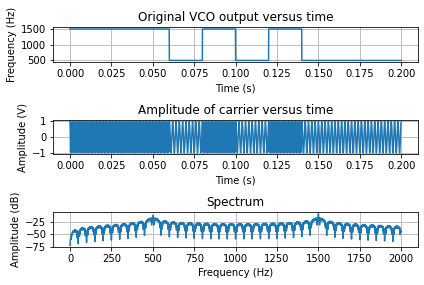

SNR = 14.003925dB


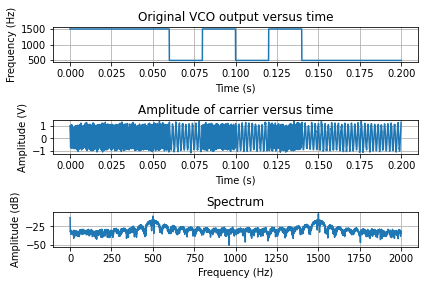

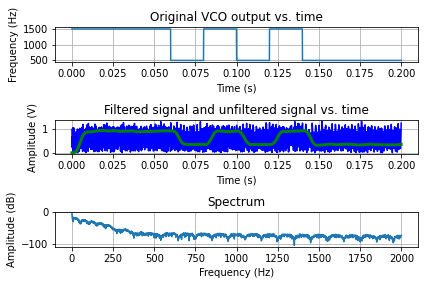

bit errors = 0
bit error percent = 0.00%


In [58]:
import numpy as np
import pylab as pl
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample

#the following variables setup the system
Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
N = 64          #how many bits to send
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.10      #noise peak amplitude
N_prntbits = 10 #number of bits to print in plots

def plot_data(y):
    #view the data in time and frequency domain
    #calculate the frequency domain for viewing purposes
    N_FFT = float(len(y))
    f = np.arange(0,Fs/2,Fs/N_FFT)
    w = np.hanning(len(y))
    y_f = np.fft.fft(np.multiply(y,w))
    y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))
    pl.subplot(3,1,1)
    pl.plot(t[0:int(Fs*N_prntbits/Fbit)],m[0:int(Fs*N_prntbits/Fbit)])
    pl.xlabel('Time (s)')
    pl.ylabel('Frequency (Hz)')
    pl.title('Original VCO output versus time')
    pl.grid(True)
    pl.subplot(3,1,2)
    pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y[0:int(Fs*N_prntbits/Fbit)])
    pl.xlabel('Time (s)')
    pl.ylabel('Amplitude (V)')
    pl.title('Amplitude of carrier versus time')
    pl.grid(True)
    pl.subplot(3,1,3)
    pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
    pl.xlabel('Frequency (Hz)')
    pl.ylabel('Amplitude (dB)')
    pl.title('Spectrum')
    pl.grid(True)
    pl.tight_layout()
    pl.show()
    
"""
Data in
"""
#generate some random data for testing
data_in = np.random.random_integers(0,1,N)

"""
VCO
"""
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc+Fdev)))
    else:
        m=np.hstack((m,np.multiply(np.ones(int(Fs/Fbit)),Fc-Fdev)))
#calculate the output of the VCO
y=np.zeros(0)
y=A * np.cos(2*np.pi*np.multiply(m,t))
plot_data(y)

"""
Noisy Channel
"""
#create some noise
noise = (np.random.randn(len(y))+1)*A_n
snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print("SNR = %fdB" % snr)
y=np.add(y,noise)
#view the data after adding noise
plot_data(y)

"""
Differentiator
"""
y_diff = np.diff(y,1)

"""
Envelope detector + low-pass filter
"""
#create an envelope detector and then low-pass filter
y_env = np.abs(sigtool.hilbert(y_diff))
h=signal.firwin( numtaps=100, cutoff=Fbit*2, nyq=Fs/2)
y_filtered=signal.lfilter( h, 1.0, y_env)
#view the data after adding noise
N_FFT = float(len(y_filtered))
f = np.arange(0,Fs/2,Fs/N_FFT)
w = np.hanning(len(y_filtered))
y_f = np.fft.fft(np.multiply(y_filtered,w))
y_f = 10*np.log10(np.abs(y_f[0:int(N_FFT/2)]/N_FFT))
pl.subplot(3,1,1)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],m[0:int(Fs*N_prntbits/Fbit)])
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO output vs. time')
pl.grid(True)
pl.subplot(3,1,2)
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],np.abs(y[0:int(Fs*N_prntbits/Fbit)]),'b')
pl.plot(t[0:int(Fs*N_prntbits/Fbit)],y_filtered[0:int(Fs*N_prntbits/Fbit)],'g',linewidth=3.0)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Filtered signal and unfiltered signal vs. time')
pl.grid(True)
pl.subplot(3,1,3)
pl.plot(f[0:int((Fc+Fdev*2)*N_FFT/Fs)],y_f[0:int((Fc+Fdev*2)*N_FFT/Fs)])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()
pl.show()

"""
slicer
"""
#calculate the mean of the signal
mean = np.mean(y_filtered)
#if the mean of the bit period is higher than the mean, the data is a 0
rx_data = []
sampled_signal = y_filtered[int(Fs/Fbit/2):len(y_filtered):int(Fs/Fbit)]
for bit in sampled_signal:
    if bit > mean:
        rx_data.append(0)
    else:
        rx_data.append(1)

bit_error=0
for i in range(0,len(data_in)):
    if rx_data[i] != data_in[i]:
        bit_error+=1
print ("bit errors = %d" % bit_error)
print ("bit error percent = %4.2f%%" % (float(bit_error)/float(N)*100))